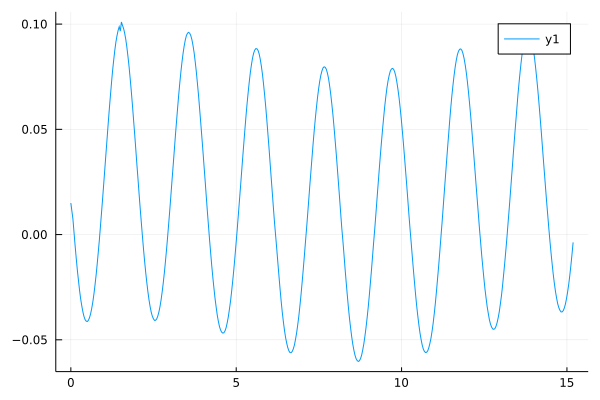

In [116]:
using CSV, Plots, DataFrames, Interpolations

df = DataFrame(CSV.File("data/102.csv"; delim="\t"));

plot(df.t, df.x)

# Pêndulo simplificado
Para um pêndulo simples, sob ação da gravidade $g$, temos:
$$
\theta'' + \frac{g}{\ell} \sin \theta = 0
$$

Para ângulos pequenos, $\sin \theta \approx \theta$, então:
$$
\theta'' + \frac{g}{\ell} \theta = 0
$$

Resolvendo a EDO, obtemos:
$$
\theta(t) = \theta_{\text{max}} \cos (\omega t + \phi)
$$

Onde 
$$
\omega = \sqrt{\frac{g}{\ell}}
$$

Então
$$
T = 2 \pi \sqrt{\frac{\ell}{g}}
$$

In [117]:
using LsqFit

function θ(t, p)
    θₘ, T, ϕ = p
    θₘ .* cos.(((2π)./T .* t) .+ ϕ)
end

# x(t) = l.sin(θ) + x₀ ≈ l.θ + x₀
l = 0.91;

# Parâmetros
x₀ = 0.03;
A = 0.055;
T = 1.9;
ϕ = π;

# x(t) = A.sin(2π t/T + ϕ) + x₀
@. model(t, p) = p[2] * sin((2*π*t)/p[3] + p[4]) + p[1];
p0 = [x₀, A, T, ϕ];

function jacobian_model(t,p)
    J = Array{Float64}(undef, length(t), length(p))
    @. J[:,1] = 1;   #dmodel/dp[1]
    @. J[:,2] = sin((2*π*t)/p[3] + p[4]);   #dmodel/dp[2]
    @. J[:,3] = -p[2] * cos((2*π*t)/p[3] + p[4]) / (p[3]*p[3]);   #dmodel/dp[3]
    @. J[:,4] = p[2] * cos((2*π*t)/p[3] + p[4]); #dmodel/dp[4], thanks to @views we don't allocate memory for the J[:,1] slice
    J
end

function cfit(df)
    fit = curve_fit(model, jacobian_model, df.t, df.x, p0);
    fit, confidence_interval(fit, 0.05)
end

fit, m = cfit(df)


(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.021544287841866256, 0.06346893174569702, 2.042874128002525, 3.099921805598303], [0.009208326682680845, 0.00456711167312326, 0.0045775128831646765, 0.004770862221280149, 0.004696619396300759, 0.0045881964908542315, 0.004103712346492382, 0.003927821462529228, 0.0035653928943698947, 0.002871671745479778  …  -0.004581347498647255, -0.004259945548698407, -0.003947820174483516, -0.0037305196054777286, -0.003479966153549764, -0.0031443983055305796, -0.00297254185567351, -0.0028891749734921077, -0.002820458019399631, -0.002664510774078065], [1.0 0.04165878908138148 0.015195003185046454 -0.06341383410225415; 1.0 -0.1515099735296071 0.015032637843734752 -0.06273622918881598; … ; 1.0 -0.5312638000016741 -0.012884489838107407 0.05377128857004742; 1.0 -0.4399286051925291 -0.013657466619189028 0.05699717939504197], true, Float64[]), [(0.02065660604447619, 0.02243196963925632), (0.06223653222570396, 0.06470133

In [118]:
function f(tup)
    m, σ = tup
    "$m ± $σ"
end

println("x₀ = $(f(m[1]))")
println("A = $(f(m[2]))")
println("T = $(f(m[3]))")
println("ϕ = $(f(m[4]))")


x₀ = 0.02065660604447619 ± 0.02243196963925632
A = 0.06223653222570396 ± 0.0647013312656901
T = -4.8636850703067844e14 ± 4.8636850703068256e14
ϕ = -1.1654193628349902e14 ± 1.165419362835052e14


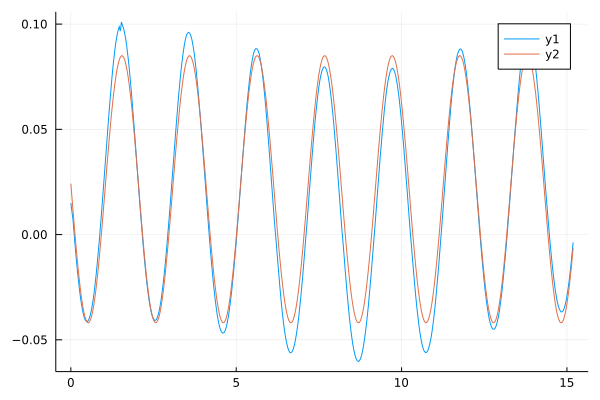

In [119]:
plot(df.t, df.x)
plot!(df.t, model(df.t, coef(fit)))